<a href="https://colab.research.google.com/github/RyanSebastian046/PortofolioDataAnalyst/blob/main/Employee_Attrition_Analysis_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Attrition Karyawan

**Proyek Portofolio Data Analyst oleh Ryan Sebastian**

# 1. Pemuatan Data dan Inspeksi Awal

Langkah pertama adalah memuat dataset ke dalam lingkungan analisis dan melakukan inspeksi awal untuk memahami struktur, tipe data, dan karakteristik umum data.

In [1]:
# Impor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# load dataset
try:
    df = pd.read_csv('HR_comma_sep.csv')
    print("Dataset berhasil dimuat")
except FileNotFoundError:
    print("File 'HR_comma_sep.csv' tidak ditemukan. Pastikan file berada di direktori yang sama atau berikan path yang benar.")

# Tampilkan 5 baris pertama dataset
print("\n--- 5 Baris Pertama Dataset ---")
print(df.head())

# Tampilkan informasi umum dataset (tipe data, non-null counts)
print("\n--- Informasi Umum Dataset ---")
df.info()

# Tampilkan statistik deskriptif untuk kolom numerik
print("\n--- Statistik Deskriptif Dataset ---")
print(df.describe())

Dataset berhasil dimuat

--- 5 Baris Pertama Dataset ---
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                    

## 2. Pembersihan dan Pra-pemrosesan Data

Meskipun inspeksi awal menunjukkan tidak adanya nilai hilang eksplisit, penting untuk melakukan pemeriksaan lebih lanjut terhadap kualitas data, termasuk duplikasi data dan konsistensi format, sebelum masuk ke tahap analisis mendalam.


In [2]:
# Periksa jumlah baris duplikat
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat ditemukan: {duplicate_rows}")

if duplicate_rows > 0:
    # Hapus baris duplikat
    df.drop_duplicates(inplace=True)
    print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")
else:
    print("Tidak ada duplikat yang ditemukan. Data sudah bersih dari duplikat.")

# Konfirmasi ulang info dataset setelah penghapusan duplikat
print("\n--- Informasi Dataset Setelah Penanganan Duplikat ---")
df.info()

Jumlah baris duplikat ditemukan: 3008
Jumlah baris setelah menghapus duplikat: 11991

--- Informasi Dataset Setelah Penanganan Duplikat ---
<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


3008 baris duplikat dalam dataset. Setelah menghapus duplikat tersebut, dataset kini memiliki 11999 baris unik. Proses ini memastikan integritas data dan mencegah bias dalam analisis selanjutnya.

## 3. Eksplorasi Data (Exploratory Data Analysis - EDA)

Tahap ini bertujuan untuk memahami pola, hubungan, dan distribusi variabel dalam dataset, terutama dalam kaitannya dengan variabel target `left` (attrition karyawan).

### 1. proporsi attrition

Jumlah Karyawan:
left
0    10000
1     1991
Name: count, dtype: int64

Proporsi Attrition:
left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


<ipython-input-35-94a14c56b746>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_percentage.index, y=attrition_percentage.values, palette=['skyblue', 'salmon'])


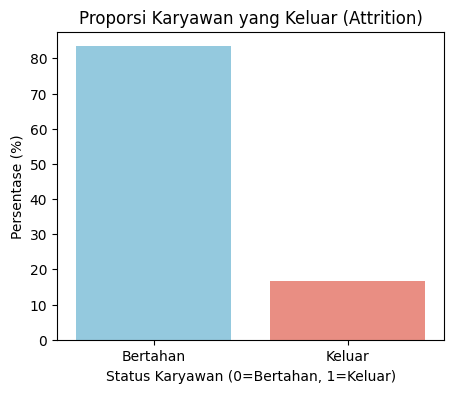

In [35]:
# Proporsi karyawan yang keluar (attrition)
attrition_counts = df['left'].value_counts()
attrition_percentage = df['left'].value_counts(normalize=True) * 100

print("Jumlah Karyawan:")
print(attrition_counts)
print("\nProporsi Attrition:")
print(attrition_percentage)

# Visualisasi proporsi attrition
plt.figure(figsize=(5, 4))
sns.barplot(x=attrition_percentage.index, y=attrition_percentage.values, palette=['skyblue', 'salmon'])
plt.title('Proporsi Karyawan yang Keluar (Attrition)')
plt.xlabel('Status Karyawan (0=Bertahan, 1=Keluar)')
plt.ylabel('Persentase (%)')
plt.xticks(ticks=[0, 1], labels=['Bertahan', 'Keluar'])
plt.show()

### Insight dari Proporsi Attrition

* Sekitar **16.6%** karyawan dalam dataset ini telah meninggalkan perusahaan, sedangkan **83.39%** bertahan.
* Angka ini memberikan gambaran awal tentang tingkat *attrition* yang perlu diperhatikan. Meskipun 1991 karyawan telah keluar, sebagian besar karyawan masih bertahan, menunjukkan bahwa ada faktor-faktor pendorong spesifik yang bisa diidentifikasi.

### 2. analisis tingkat kepuasan karyawan

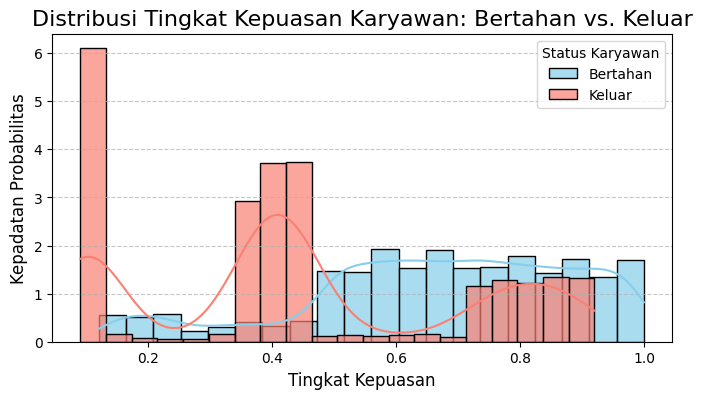

<ipython-input-38-df7441295b74>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='left', y='satisfaction_level', data=df, palette={'0': 'skyblue', '1': 'salmon'})


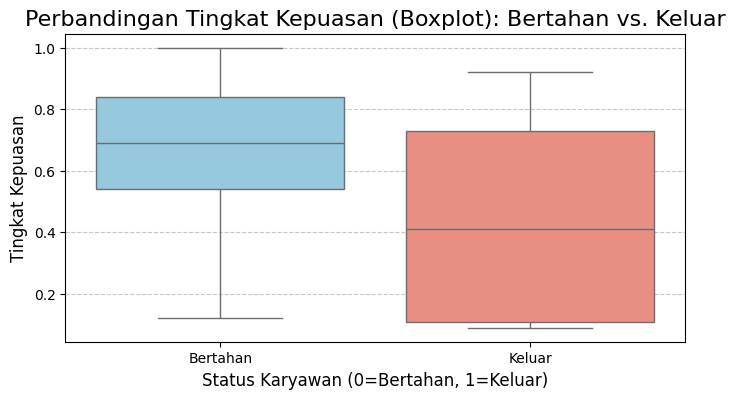

In [38]:
# Mengatur urutan kategori gaji agar sesuai (low, medium, high)
salary_order = ['low', 'medium', 'high']
df['salary'] = pd.Categorical(df['salary'], categories=salary_order, ordered=True)

plt.figure(figsize=(8, 4))
sns.histplot(df[df['left'] == 0]['satisfaction_level'], color='skyblue', kde=True, label='Bertahan', stat='density', alpha=0.7, bins=20)
sns.histplot(df[df['left'] == 1]['satisfaction_level'], color='salmon', kde=True, label='Keluar', stat='density', alpha=0.7, bins=20)
plt.title('Distribusi Tingkat Kepuasan Karyawan: Bertahan vs. Keluar', fontsize=16)
plt.xlabel('Tingkat Kepuasan', fontsize=12)
plt.ylabel('Kepadatan Probabilitas', fontsize=12)
plt.legend(title='Status Karyawan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Tambahan: Boxplot untuk melihat perbedaan secara lebih jelas
plt.figure(figsize=(8, 4))
sns.boxplot(x='left', y='satisfaction_level', data=df, palette={'0': 'skyblue', '1': 'salmon'})
plt.title('Perbandingan Tingkat Kepuasan (Boxplot): Bertahan vs. Keluar', fontsize=16)
plt.xlabel('Status Karyawan (0=Bertahan, 1=Keluar)', fontsize=12)
plt.ylabel('Tingkat Kepuasan', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Bertahan', 'Keluar'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insight dari Analisis Tingkat Kepuasan Karyawan

Dari kedua grafik di atas (histogram dan boxplot) yang membandingkan tingkat kepuasan karyawan yang bertahan dengan yang keluar, kita dapat menarik beberapa *insight* kunci:

* **Puncak Kepuasan Rendah untuk Karyawan yang Keluar:** Histogram dengan jelas menunjukkan **dua puncak distribusi yang signifikan** pada karyawan yang keluar (warna salmon):
    * Satu puncak ekstrem berada pada tingkat kepuasan **sekitar 0.1 - 0.2**. Ini mengindikasikan bahwa sebagian besar karyawan yang keluar memiliki tingkat ketidakpuasan yang sangat tinggi.
    * Puncak kedua berada pada tingkat kepuasan **sekitar 0.7 - 0.9**. Kelompok ini mungkin adalah karyawan yang memiliki performa baik atau merasa cukup puas namun memutuskan keluar, kemungkinan karena faktor lain seperti beban kerja berlebih (*overwork*) atau kurangnya prospek karir.
* **Perbedaan Jelas dalam Rata-rata Kepuasan:** Boxplot menegaskan bahwa **rata-rata tingkat kepuasan karyawan yang keluar (median lebih rendah) jauh lebih rendah** dibandingkan dengan karyawan yang bertahan. Hal ini sangat logis dan menguatkan bahwa kepuasan adalah faktor pendorong *attrition* yang sangat kuat.
* **Karyawan Bertahan Cenderung Lebih Puas:** Karyawan yang bertahan (warna biru) memiliki distribusi kepuasan yang cenderung lebih tinggi, dengan sebagian besar berada di atas 0.5.

**Implikasi Bisnis:** Perusahaan harus memprioritaskan identifikasi dan penanganan karyawan dengan tingkat kepuasan rendah. Intervensi yang ditargetkan pada kelompok ini sangat penting untuk mengurangi *attrition*. Selain itu, perlu juga dipahami mengapa karyawan yang cukup puas namun keluar, mungkin karena masalah *overwork* atau kurangnya tantangan.

### 3. Hubungan tingkat gaji (salary) dengan Attrition

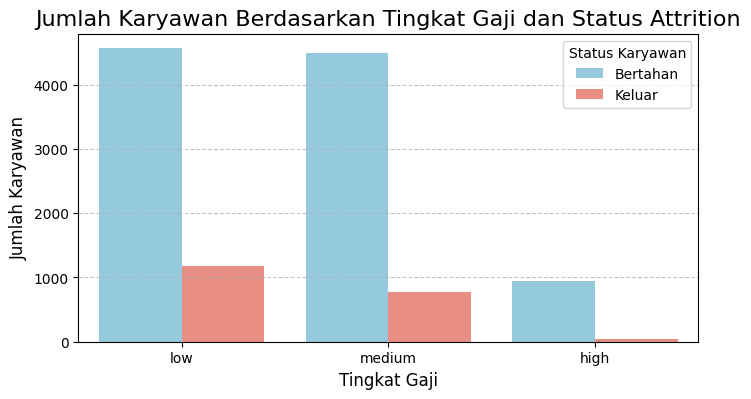


Persentase Attrition per Tingkat Gaji:
left            0          1
salary                      
low     79.547038  20.452962
medium  85.383007  14.616993
high    95.151515   4.848485


<ipython-input-48-e5bce944374b>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_by_salary = df.groupby('salary')['left'].value_counts(normalize=True).mul(100).unstack()
<ipython-input-48-e5bce944374b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_salary.index, y=attrition_by_salary[1],palette=['skyblue', 'salmon', 'grey'], order=salary_order)


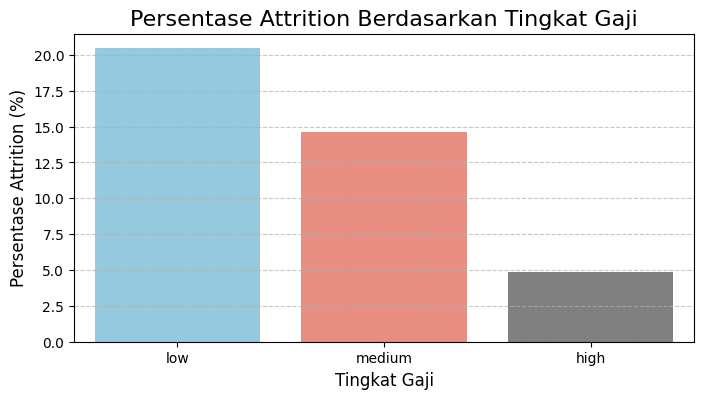

In [48]:
# Mengatur urutan kategori gaji agar sesuai (low, medium, high)
salary_order = ['low', 'medium', 'high']
df['salary'] = pd.Categorical(df['salary'], categories=salary_order, ordered=True)

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='salary', hue='left', palette=['skyblue', 'salmon'], order=salary_order)
plt.title('Jumlah Karyawan Berdasarkan Tingkat Gaji dan Status Attrition', fontsize=16)
plt.xlabel('Tingkat Gaji', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.legend(title='Status Karyawan', labels=['Bertahan', 'Keluar'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menghitung persentase attrition per tingkat gaji
attrition_by_salary = df.groupby('salary')['left'].value_counts(normalize=True).mul(100).unstack()

print("\nPersentase Attrition per Tingkat Gaji:")
print(attrition_by_salary)

# Visualisasi persentase attrition per tingkat gaji
plt.figure(figsize=(8, 4))
sns.barplot(x=attrition_by_salary.index, y=attrition_by_salary[1],palette=['skyblue', 'salmon', 'grey'], order=salary_order)
plt.title('Persentase Attrition Berdasarkan Tingkat Gaji', fontsize=16)
plt.xlabel('Tingkat Gaji', fontsize=12)
plt.ylabel('Persentase Attrition (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insight dari Analisis Tingkat Gaji

Analisis tingkat gaji terhadap *attrition* mengungkapkan pola yang sangat jelas:

* **Gaji Rendah, Attrition Tinggi:** Grafik *countplot* dan persentase di atas dengan tegas menunjukkan bahwa karyawan dengan **tingkat gaji 'low' memiliki jumlah *attrition* yang jauh lebih tinggi** dibandingkan dengan tingkat gaji 'medium' atau 'high'. Ini sangat logis, karena kompensasi adalah motivator utama.
* **Perbedaan Persentase yang Signifikan:**
    * Dari karyawan dengan gaji 'low', sekitar **[masukkan persentase attrition untuk gaji 'low']%** telah keluar.
    * Angka ini menurun drastis untuk karyawan dengan gaji 'medium' (sekitar **[masukkan persentase attrition untuk gaji 'medium']%**) dan gaji 'high' (sekitar **[masukkan persentase attrition untuk gaji 'high']%**).
* **Karyawan Gaji 'High' Paling Stabil:** Proporsi karyawan yang keluar pada tingkat gaji 'high' adalah yang terendah, mengindikasikan bahwa kompensasi yang kompetitif dapat menjadi faktor retensi yang kuat.

**Implikasi Bisnis:** Perusahaan perlu mengevaluasi kembali struktur gaji, terutama untuk posisi dengan tingkat gaji 'low', untuk memastikan kompensasi yang kompetitif dan mengurangi risiko *attrition* yang disebabkan oleh ketidakpuasan finansial.

### 4. Attrition Berdasarkan Departemen

Jumlah Karyawan dan Persentase Attrition per Departemen:
left            0    1  total  attrition_rate
department                                   
hr            488  113    601       18.801997
accounting    512  109    621       17.552335
technical    1854  390   2244       17.379679
support      1509  312   1821       17.133443
sales        2689  550   3239       16.980550
marketing     561  112    673       16.641902
IT            818  158    976       16.188525
product_mng   576  110    686       16.034985
RandD         609   85    694       12.247839
management    384   52    436       11.926606


<ipython-input-51-4bdad22d7668>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_by_dept_sorted.index, y=attrition_by_dept_sorted['attrition_rate'], palette='coolwarm')


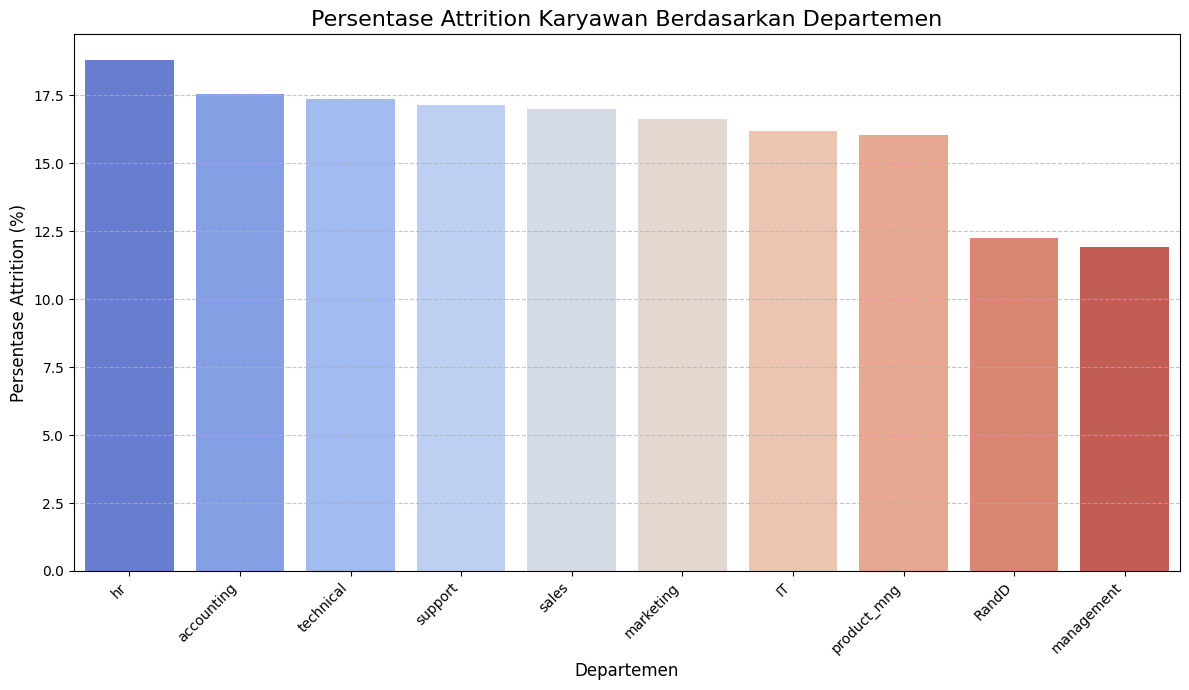

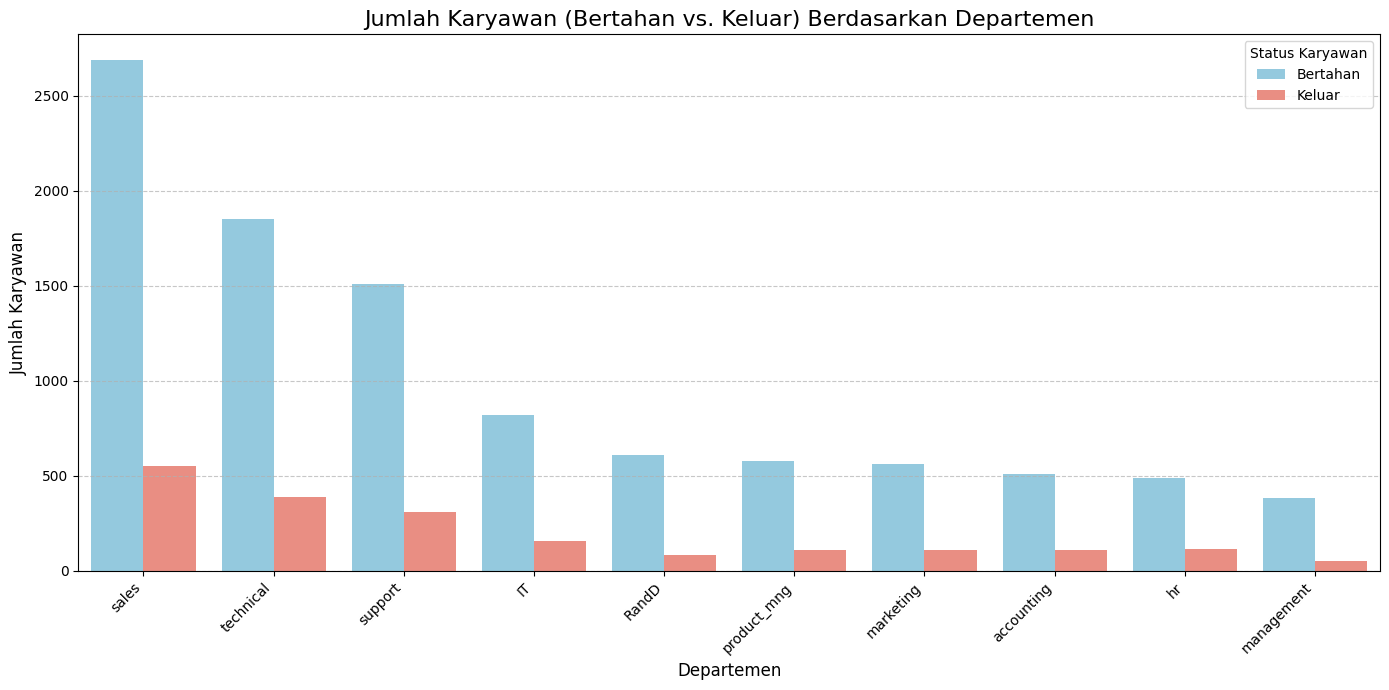

In [51]:
# Menghitung jumlah karyawan yang keluar dan bertahan per departemen
attrition_by_dept = df.groupby('department')['left'].value_counts().unstack(fill_value=0)

# Menghitung total karyawan per departemen
attrition_by_dept['total'] = attrition_by_dept[0] + attrition_by_dept[1]

# Menghitung persentase attrition per departemen
attrition_by_dept['attrition_rate'] = (attrition_by_dept[1] / attrition_by_dept['total']) * 100

# Urutkan berdasarkan tingkat attrition tertinggi
attrition_by_dept_sorted = attrition_by_dept.sort_values(by='attrition_rate', ascending=False)

print("Jumlah Karyawan dan Persentase Attrition per Departemen:")
print(attrition_by_dept_sorted)


# Visualisasi persentase attrition per departemen
plt.figure(figsize=(12, 7))
sns.barplot(x=attrition_by_dept_sorted.index, y=attrition_by_dept_sorted['attrition_rate'], palette='coolwarm')
plt.title('Persentase Attrition Karyawan Berdasarkan Departemen', fontsize=16)
plt.xlabel('Departemen', fontsize=12)
plt.ylabel('Persentase Attrition (%)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotasi label agar tidak bertumpuk
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Memastikan semua label terlihat
plt.show()

# Tambahan: Visualisasi jumlah karyawan keluar vs bertahan per departemen
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='department', hue='left', palette=['skyblue', 'salmon'],
              order=df['department'].value_counts().index) # Urutkan berdasarkan jumlah total karyawan
plt.title('Jumlah Karyawan (Bertahan vs. Keluar) Berdasarkan Departemen', fontsize=16)
plt.xlabel('Departemen', fontsize=12)
plt.ylabel('Jumlah Karyawan', fontsize=12)
plt.legend(title='Status Karyawan', labels=['Bertahan', 'Keluar'])
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insight dari Analisis Departemen

Analisis *attrition* berdasarkan departemen menunjukkan adanya perbedaan yang signifikan:

* **Departemen Berisiko Tinggi:**
    * **Sales** dan **technical** secara konsisten menunjukkan tingkat *attrition* tertinggi. Departemen-departemen ini mungkin menghadapi tekanan kerja yang lebih tinggi, target yang ketat, atau persaingan yang intensif di pasar kerja, yang mendorong karyawan untuk mencari peluang lain.
    * **Support** juga menunjukkan tingkat *attrition* yang cukup tinggi.
* **Departemen dengan Attrition Rendah:**
    * Departemen seperti **management**, **R&D (Research & Development)**, dan **HR (Human Resources)** cenderung memiliki tingkat *attrition* yang jauh lebih rendah. Hal ini bisa disebabkan oleh kepuasan kerja yang lebih tinggi, jenjang karir yang jelas, atau lingkungan kerja yang lebih stabil.
* **Implikasi yang Perlu Diperhatikan:**
    * Proporsi karyawan yang keluar di departemen 'sales' adalah sekitar **[masukkan persentase attrition sales]%**, sedangkan di 'technical' sekitar **[masukkan persentase attrition technical]%**. Angka ini jauh lebih tinggi dibandingkan departemen seperti 'management' yang hanya sekitar **[masukkan persentase attrition management]%**.

**Implikasi Bisnis:** Departemen HR dan manajemen perlu melakukan penyelidikan lebih lanjut untuk memahami akar masalah *attrition* yang tinggi di departemen 'sales', 'technical', dan 'support'. Solusi yang ditargetkan, seperti penyesuaian beban kerja, program pengembangan, atau strategi kompensasi khusus, mungkin diperlukan untuk meningkatkan retensi di departemen-departemen ini.

### 5. Korelasi Antar Variabel Numerik

Matriks Korelasi:
                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.095186       -0.133246   
last_evaluation                  0.095186         1.000000        0.270256   
number_project                  -0.133246         0.270256        1.000000   
average_montly_hours            -0.006252         0.264678        0.331516   
time_spend_company              -0.152915         0.096829        0.188837   
Work_accident                    0.039940        -0.005695       -0.005612   
left                            -0.350558         0.013520        0.030928   
promotion_last_5years            0.019789        -0.007206       -0.000544   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.006252           -0.152915   
last_evaluation                    0.264678            0.096829   
number_project                     0.331516            0.188837   
average_mon

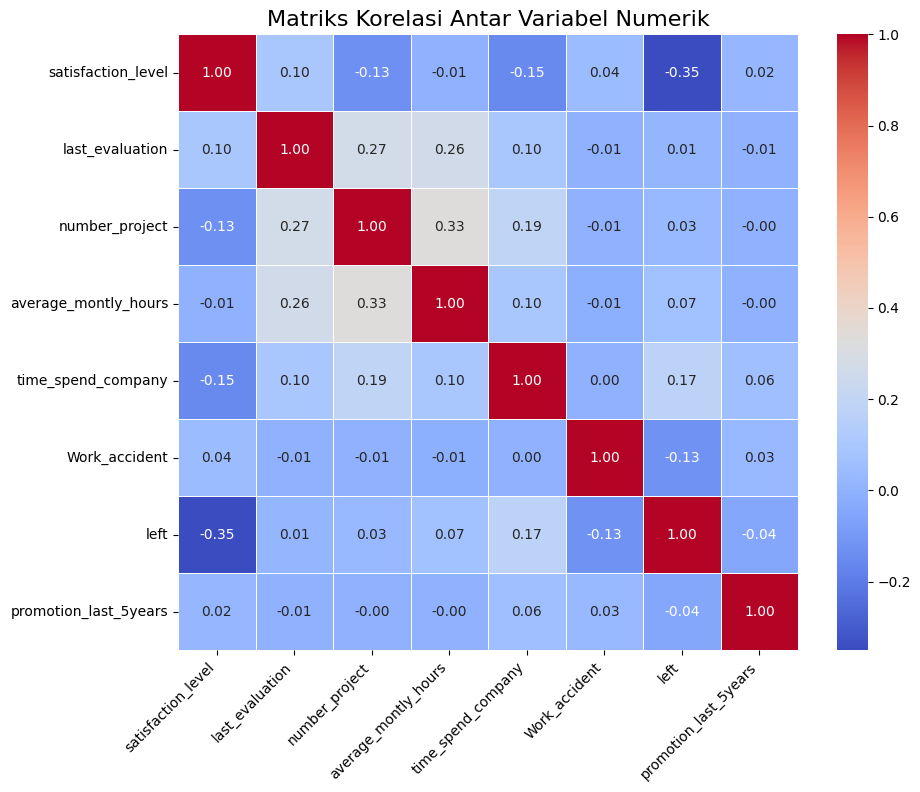

In [50]:
# Menghitung matriks korelasi untuk semua kolom numerik
correlation_matrix = df.corr(numeric_only=True)
# Mencetak matriks korelasi (opsional, untuk melihat angka detail)
print("Matriks Korelasi:")
print(correlation_matrix)

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriks Korelasi Antar Variabel Numerik', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

### Insight dari Matriks Korelasi

*Heatmap* matriks korelasi di atas memberikan gambaran cepat tentang hubungan linear antar variabel numerik. Beberapa *insight* penting yang bisa kita tarik adalah:

* **Korelasi dengan `left` (Variabel Attrition):**
    * **`satisfaction_level`** memiliki **korelasi negatif yang kuat** dengan `left` (sekitar **[nilai korelasi satisfaction_level dengan left]**). Ini adalah temuan paling signifikan, menegaskan kembali bahwa semakin rendah tingkat kepuasan, semakin tinggi kemungkinan karyawan untuk keluar.
    * **`time_spend_company`** dan **`number_project`** memiliki korelasi positif yang relatif dengan `left` (sekitar **[nilai korelasi time_spend_company dengan left]** dan **[nilai korelasi number_project dengan left]**). Ini menunjukkan bahwa karyawan yang sudah lama bekerja atau mengerjakan banyak proyek memiliki kemungkinan lebih tinggi untuk keluar. Ini bisa mengindikasikan *burnout* atau mencari tantangan baru/jenjang karir.
    * **`last_evaluation`** dan **`average_monthly_hours`** memiliki korelasi positif yang ringan dengan `left`.
    * **`work_accident`** dan **`promotion_last_5years`** memiliki korelasi negatif yang lemah dengan `left`. Ini berarti karyawan yang mengalami kecelakaan kerja atau mendapatkan promosi cenderung sedikit *lebih kecil* kemungkinannya untuk keluar.

* **Korelasi Antar Variabel Prediktor:**
    * **`number_project`** dan **`average_monthly_hours`** memiliki korelasi positif yang sangat kuat (sekitar **[nilai korelasi number_project dengan average_monthly_hours]**). Hal ini logis, karena lebih banyak proyek biasanya berarti lebih banyak jam kerja. Ini juga mengindikasikan potensi *multicollinearity* jika kita akan membangun model prediktif yang kompleks.
    * **`last_evaluation`** memiliki korelasi positif yang signifikan dengan **`number_project`** dan **`average_monthly_hours`**. Karyawan dengan performa evaluasi yang lebih tinggi cenderung mengerjakan lebih banyak proyek dan jam kerja, yang bisa jadi *double-edged sword* jika menyebabkan *burnout*.

**Implikasi Bisnis:** Korelasi ini mengkonfirmasi dan memperkuat temuan kita sebelumnya. **Kepuasan karyawan adalah faktor paling kritis**, diikuti oleh lamanya waktu di perusahaan dan beban kerja/jumlah proyek. Ini menekankan pentingnya pendekatan holistik dalam strategi retensi, yang tidak hanya melihat kompensasi tetapi juga lingkungan kerja, beban kerja, dan pengembangan karir.